In [1]:
import streamlit as st
import pandas as pd
import numpy as np

pipe = np.array(['x-2','x-p','x-1','E-p','E-2','p-1','s-1'])
W = np.array([22.46,22.46,22.46,21.92,21.92,23.32,23.75])
pc = np.array([6262,8241,12026,7662,5514,12999,15672])
pt = np.array([394612,394612,501087,311536,311536,553833,712070])
pb = np.array([8941,11005,12037,8688,7059,13304,17105])
pf = pd.DataFrame({'pipe' : pipe , 'W' : W , 'pc' : pc , 'pt' : pt , 'pb' : pb})
df = pf.set_index("pipe")
numeric_cols = df.index
""""Drillstring Design App by using of Python"""
st.title("Drillstring Design App") 
# add a checkbox to sidebar
check_box = st.sidebar.checkbox(label = 'Display the Dataset')

if check_box:
    st.write(df)
    
st.sidebar.title("Require Data")
Mud_weight  = st.sidebar.number_input(label="Mud_weight(in ppg)", step = 0.01)
Well_depth = st.sidebar.number_input(label = "WElldepth(in feet)", step = 0.01)
Mop = st.sidebar.number_input(label = "Mop (in lbf)", step =  0.01)
SFT = st.sidebar.number_input(label = 'Safty factor', step = 0.01)
WOB = st.sidebar.number_input(label = "Weight_on_bit (in lbf)", step =  0.01)
FPG = st.sidebar.number_input(label = 'Fracture Pressure Grident in psi', step = 0.01)
Well_Bore_size = st.sidebar.number_input(label ="Well_bore_size (in inch)", step = 0.01)
Wc = st.sidebar.number_input(label="Weight_of_Drillcollar(lbf/ft)", step = 0.01)
Wp = st.sidebar.number_input(label="Weight_of_Drillpipe(lbf/ft)",  step = 0.01)


# multiselect
feature_selection = st.sidebar.multiselect(label = "Select Avilable Drillpipe", 
                                           options = numeric_cols)

### print the given pipes
def picker(feature_selection,df):
    df_results = pd.DataFrame(data = np.zeros(df.shape), columns = df.columns)
    df_results = df_results.iloc[:len(feature_selection),:]
    df_results.index = pd.Series(data = feature_selection, name = "pipe")
    for pipe in feature_selection:
        df_results.loc[pipe] = df.loc[pipe]
    
    return df_results
dd = picker(feature_selection,df)
st.write(dd)
  



####Selection
pf = Well_depth * FPG

aa = dd.loc[dd.pb >= pf]










    




<ipython-input-1-f80321d162ba>:41: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_results.index = pd.Series(data = feature_selection, name = "pipe")


In [ ]:
B = float(1- Mud_weight/65.4)

In [ ]:
Ldc = float((WOB + Well_depth * Wp * (1 - B))/(Wc - (1 - B) * (Wp - Wc)))
st.write(f'Drill collar size = {Ldc} feet (from {Well_depth - Ldc} feet to {Well_depth} feet) ')

In [ ]:
ph = 0.052 * Mud_weight * (Well_depth - Ldc)

pp = aa.loc[dd.pc > ph]
bb = pp.sort_values(by = 'pt')
st.write(bb)
a = ((bb.iloc[0,2] * 0.9) - Mop)/((bb.iloc[0,0]) * B ) - ((Ldc * Wc) / (bb.iloc[0,0]))
b = ((bb.iloc[0,2] * 0.9))/((bb.iloc[0,0]) *SFT * B ) - ((Ldc * Wc) / (bb.iloc[0,0]))
if (Ldc + a) > Well_depth or (Ldc + b) > Well_depth:
    Lp1 = (Well_depth - Ldc)
else:
    if a < b:
        Lp1 = a
    else: 
        Lp1 = b
st.write(f'Section_1 size is =  {Lp1} feet (from {Well_depth - Lp1 - Ldc} feet to {Well_depth - Ldc} feet use drill pipe {bb.index[0]})')

In [ ]:
Depth_left = Well_depth - Ldc - Lp1

a1 = ((bb.iloc[1,2] * 0.9) - Mop)/((bb.iloc[1,0]) * B ) - (((Ldc * Wc) + (Lp1 * (bb.iloc[1,0])))   / (bb.iloc[1,0]))
b2 = ((bb.iloc[1,2] * 0.9))/((bb.iloc[1,0]) *SFT * B ) - (((Ldc * Wc) + (Lp1 * (bb.iloc[1,0]))) / (bb.iloc[1,0]))


if (Lp1 + Ldc) >= Well_depth:
    Lp2 = 0
elif (Lp1 + Ldc) < Well_depth and Well_depth < (Lp1 + Ldc + a1) and Well_depth < (Lp1 + Ldc + b2):
    Lp2 = (Well_depth - Ldc - Lp1)

else:
    if a < b:
        Lp2 = a1
    else: 
        Lp2 = b2

st.write(f'Section_2 size is =  {Lp2} feet (from {Well_depth - Lp2 -Lp1 - Ldc } feet to {Well_depth - Lp1 - Ldc} feet use drill pipe {bb.index[1]} )')       

In [ ]:
if (Ldc - Lp1 - Lp2) > Well_depth:
    Lp3 = 0
else:
    Lp3 = Well_depth - Ldc - Lp1 - Lp2
    
st.write(f'Section_3 size is =  {Lp3} feet (from Surface to {Well_depth - Lp2 - Lp1 - Ldc} feet use drill pipe {bb.index[2]})' )

## Required data and of app Output

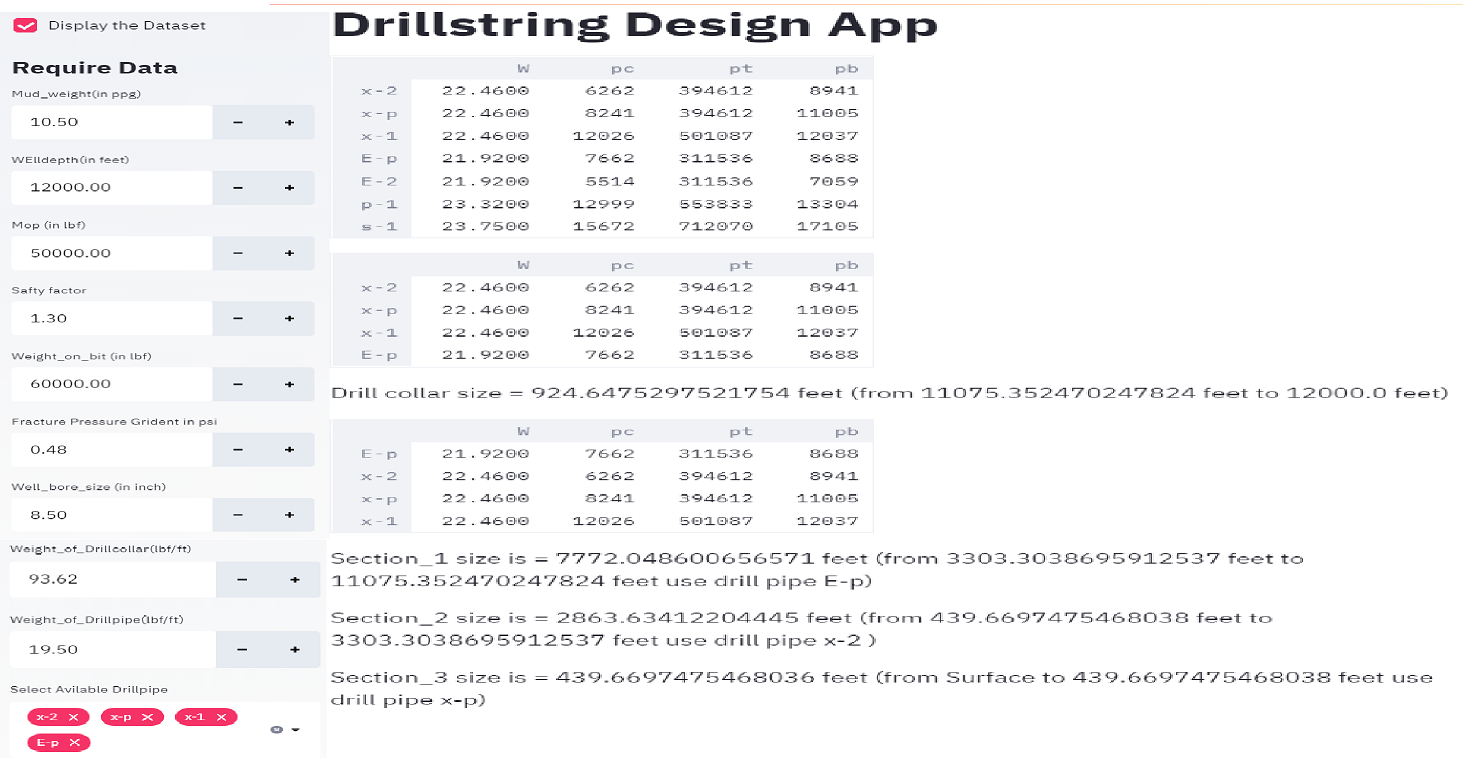